In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(
      io.BytesIO(uploaded[fn]),
      encoding='latin-1',
      delimiter=',',
      quotechar='"',

      on_bad_lines='skip',
  )


Saving AirfoilSelfNoise.csv to AirfoilSelfNoise.csv
User uploaded file "AirfoilSelfNoise.csv" with length 59882 bytes


In [30]:
df


,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [31]:
print(df.describe())

                  f        alpha            c   U_infinity        delta  \
count   1503.000000  1503.000000  1503.000000  1503.000000  1503.000000   
mean    2886.380572     6.782302     0.136548    50.860745     0.011140   
std     3152.573137     5.918128     0.093541    15.572784     0.013150   
min      200.000000     0.000000     0.025400    31.700000     0.000401   
25%      800.000000     2.000000     0.050800    39.600000     0.002535   
50%     1600.000000     5.400000     0.101600    39.600000     0.004957   
75%     4000.000000     9.900000     0.228600    71.300000     0.015576   
max    20000.000000    22.200000     0.304800    71.300000     0.058411   

              SSPL  
count  1503.000000  
mean    124.835943  
std       6.898657  
min     103.380000  
25%     120.191000  
50%     125.721000  
75%     129.995500  
max     140.987000  


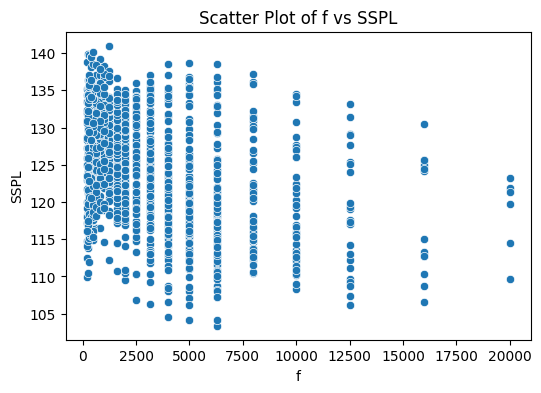

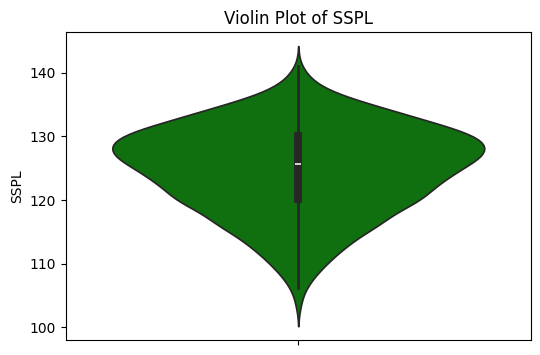

<ipython-input-27-99fa83d244e4>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['alpha'], y=df['delta'], ci=None)  # ci=None removes confidence intervals


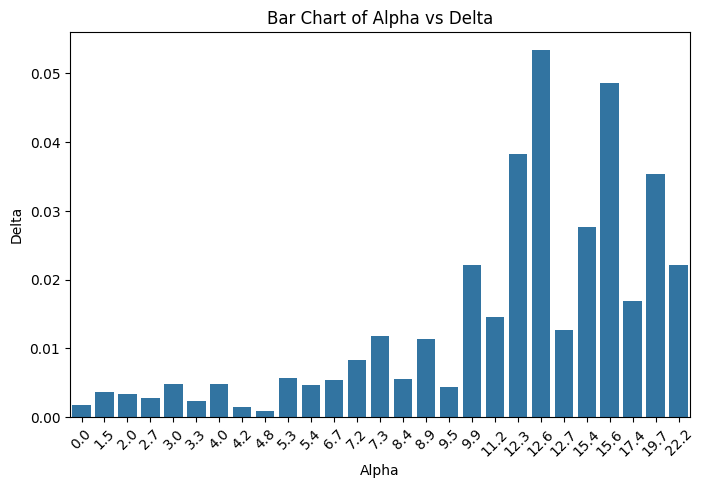

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['f'], y=df['SSPL'])
plt.xlabel("f")
plt.ylabel("SSPL")
plt.title("Scatter Plot of f vs SSPL")
plt.show()


plt.figure(figsize=(6,4))
sns.violinplot(y=df['SSPL'], color='green')
plt.ylabel("SSPL")
plt.title("Violin Plot of SSPL")
plt.show()



plt.figure(figsize=(8,5))
sns.barplot(x=df['alpha'], y=df['delta'], ci=None)  # ci=None removes confidence intervals
plt.xlabel("Alpha")
plt.ylabel("Delta")
plt.title("Bar Chart of Alpha vs Delta")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()



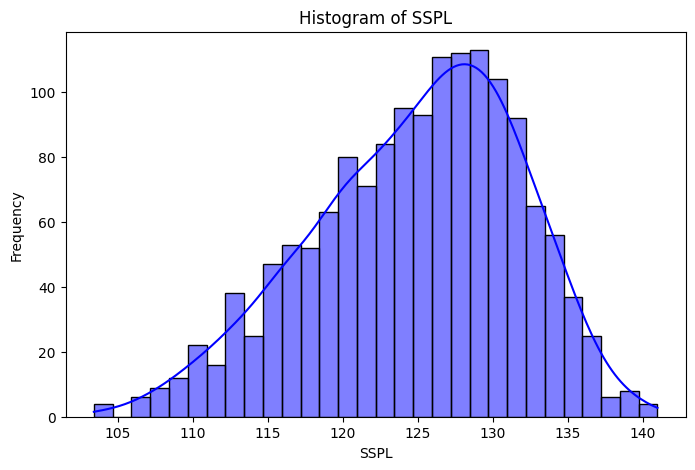

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['SSPL'], bins=30, kde=True, color='blue')  # KDE adds a smooth density curve
plt.xlabel("SSPL")
plt.ylabel("Frequency")
plt.title("Histogram of SSPL")
plt.show()


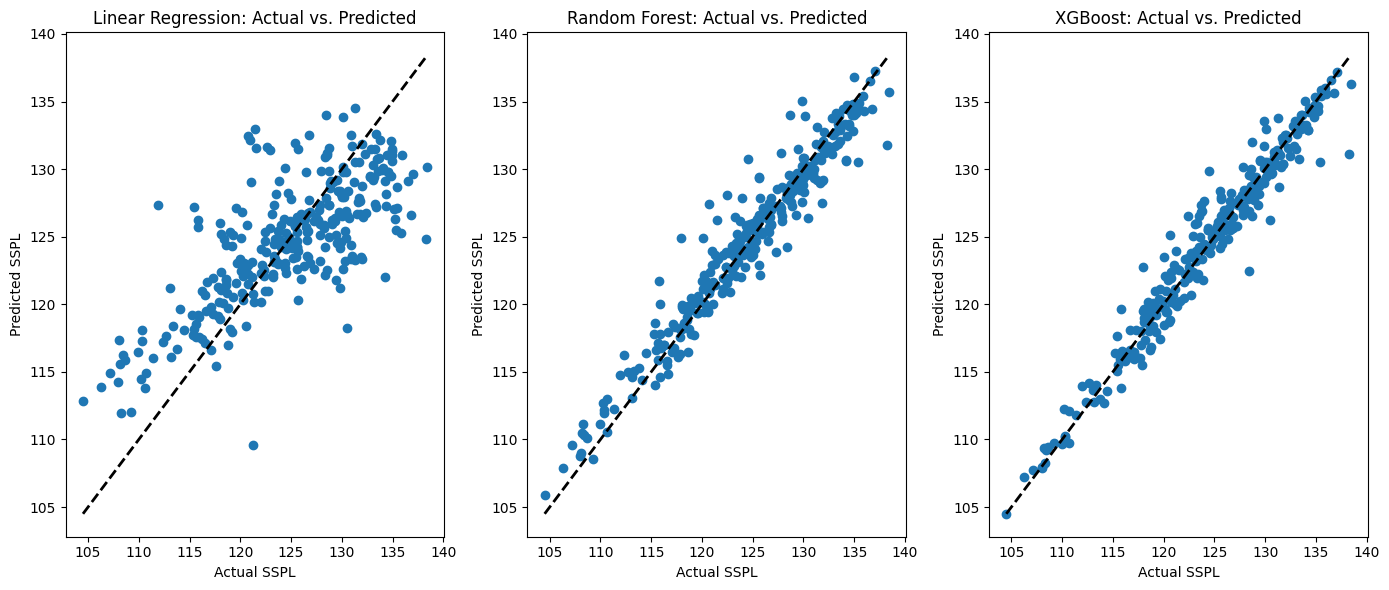

               Model        MSE       MAE        R²
0  Linear Regression  22.128643  3.672415  0.558298
1      Random Forest   3.278724  1.311934  0.934555
2            XGBoost   2.117893  1.012634  0.957725


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Assuming df is your DataFrame
X = df[['f', 'alpha', 'c', 'U_infinity', 'delta']]
y = df['SSPL']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_regressor = LinearRegression()
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train models
linear_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_regressor.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test)
y_pred_xgb = xgb_regressor.predict(X_test)

# Evaluate models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)


# Plot the actual vs predicted values for each model
plt.figure(figsize=(14, 6))

# Linear Regression plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add diagonal line
plt.xlabel("Actual SSPL")
plt.ylabel("Predicted SSPL")
plt.title("Linear Regression: Actual vs. Predicted")

# Random Forest plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add diagonal line
plt.xlabel("Actual SSPL")
plt.ylabel("Predicted SSPL")
plt.title("Random Forest: Actual vs. Predicted")

# XGBoost plot
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add diagonal line
plt.xlabel("Actual SSPL")
plt.ylabel("Predicted SSPL")
plt.title("XGBoost: Actual vs. Predicted")

# Display the plots
plt.tight_layout()
plt.show()


# Creating model names and their corresponding metrics
metrics_dict = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MSE': [mse_linear, mse_rf, mse_xgb],
    'MAE': [mae_linear, mae_rf, mae_xgb],
    'R²': [r2_linear, r2_rf, r2_xgb]
}

# Creating a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Display the metrics table
print(metrics_df)

